In [1]:
%run stdPackages.ipynb
os.chdir(d['py'])
import US_main, US_c, US_policy
os.chdir(d['curr'])

## US FH:

Define data and parameters:

In [2]:
dates_log = pd.Index([1950, 1980, 2010, 2040, 2070, 2100], name = 't')
ν_log = np.array([1.504840069, 1.394563144, 1.178137696, 1.055068673, 1.018706685, 1.018706685])
T_log = len(ν_log)
T = T_log+5
dates = dates_log.union(pd.Index([dates_log[-1]+30*i for i in range(1,T-T_log+1)]))
ν = np.hstack([ν_log, np.full(T-T_log, ν_log[-1])])
A = np.ones(T) # normalize exog. productivity at 1 
t0date = 2010 # calibration date
t0 = dates.get_loc(t0date) # index for year of calibration 


# "Simple" calibration:
α = .281 # capital income share

# Household types:
γj  = np.array([.056, 0.449, 0.307, 0.188])
ni = len(γj)-1
hours = np.array([1415.38, 2114.79, 2315.83, 2458.91]) # hours
wagerates = np.array([6.914, 14.88, 27.32, 62.26]) # wages
income = hours*wagerates
zxj = hours/hours[1:].mean()
zηj = income/income[1:].mean()
pj = np.array([0.385, 0.55, 0.652, 0.74])
μj = np.array([0.362, 0.526, 0.684, 0.756]) # voter turnout 


# other targets:
τ0 = .158 # target labor tax rate
RR = 39.4/50.1 # replacement rate
universalShare = 3.4/15.8 # share of ss going to universal
R0 = 2.443 


# Initial/baseline values:
ξ0 = .35
ρ0 = 1.5
ω0 = 1.2
# βj = np.ones(ni+1)

Package them in kwargs:

In [3]:
kwargs = {'α': α, 'A': A, 'ν': ν, 'γj': γj, 'zxj': zxj, 'zηj': zηj, 'pj': pj, 'μj': μj, 'τ0': τ0, 'RR0': RR, 'UShare0': universalShare, 'R0': R0, 'ξ': ξ0, 'ρ': ρ0, 'ω': ω0}

Initialize model:

In [4]:
m = US_main.Model(ni = ni, T = T, gridkwargs = {'glob_ns': 25}, **kwargs)

Solve a simple calibration:

In [5]:
m.USCalSimple_PEE_FH(t0);
m.USCalSimple_ESC_FH(t0)
sol, pol = m.ESC_FH(returnPols = True)

Set political weight of the HtM to zero. Recompute and check the solution:

In [6]:
# m.db['μj'][0] = 0
# m.db['μ0'] = 0

*Add robust solution method:*

In [8]:
grids = m.ESC.grids | {'n': {'τ': 21, 'θ': 21, 'eps': 21}}
m.ESC.kwargs_t = {'style': 'GridSC'} | grids
m.ESC.kwargs_T = {'style': 'GridSC'} | grids

*Solve again:*

For $\rho \approx 1.5$ vary voter turnout for the two poorest:

In [9]:
μ0, μ1 = m.db['μj'][0], m.db['μj'][1]

Product grid:

In [63]:
grid = np.linspace(0,1,101)

In [38]:
solsNew, polsNew = dict.fromkeys(grid), dict.fromkeys(grid)

Def:

In [19]:
# df = pd.concat([soli['eps'] for soli in sols.values()], axis = 1)
# df.set_axis(μ1s, axis = 1).stack().xs(4, level = 't').plot(figsize=(4,3));

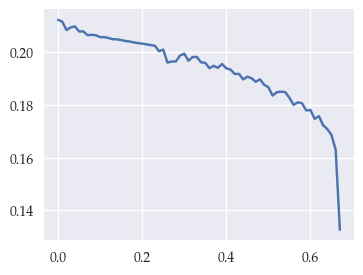

In [70]:
gactive = grid[grid<.68]
df = pd.concat([soli['τ'] for k, soli in sols.items() if k in gactive], axis = 1)
df.set_axis(gactive, axis = 1).stack().xs(2, level = 't').plot(figsize=(4,3));

In [39]:
for g in grid:
    # m.db['ρ'] = ρ
    # m.db['μj'][1] = μi
    m.db['μj'][0] = μ0*g
    m.db['μ0'] = μ0*g
    m.db['μj'][1] = μ1*g
    m.db['μi'][0] = μ1*g
    solsNew[g], polsNew[g] = m.ESC_FH(returnPols = True)
    print(g)

1.0
0.99
0.98
0.97
0.96
0.95
0.94
0.9299999999999999
0.92
0.91
0.9
0.89
0.88
0.87
0.86
0.85
0.84
0.83
0.8200000000000001
0.81
0.8
0.79
0.78
0.77
0.76
0.75
0.74
0.73
0.72
0.71


ValueError: operands could not be broadcast together with shapes (525,) (526,) 

In [93]:
soltest, poltest = m.ESC_FH(returnPols = True)

Now, try to increase $\rho$ by a lot and see what happens to the solution:

In [42]:
m.db['ρ'] = 2

In [43]:
soltest, poltest = m.ESC_FH(returnPols = True)

Now, start increasing $\rho$:

In [ ]:
m.ESC.kwargs_t = {'style': 'GridSC'} | grids

In [ ]:
sols, pols = 

In [8]:
m.ESC.kwargs_t = {'style': 'GridSC'} | grids
m.ESC.kwargs_T = {'style': 'GridSC'} | grids

In [9]:
soltest, poltest = m.ESC_FH(returnPols = True)

Adjust $\mu$ shares:

Calibrateτ

In [8]:
m.db['μj'][0] = .1
m.db['μ0'] = .1

In [9]:
m.db['μj'][1] = .15
m.db['μi'][0] = .15

In [10]:
soltest, poltest = m.ESC_FH(returnPols = True)

<Axes: xlabel='t'>

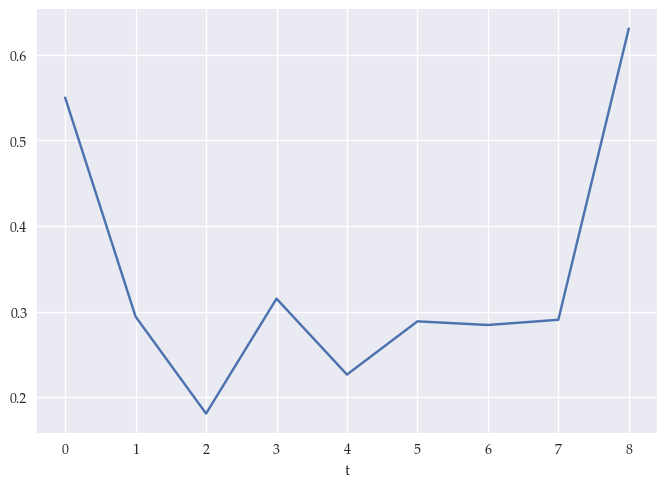

In [14]:
soltest['eps'].plot()

Check it out again:

In [15]:
# m.USCalSimple_ESC_FH(t0)
# sol1, pol1 = m.ESC_FH(returnPols = True)